# **Gestão Preditiva de Infraestrutura Digital**

---

**Discentes**:
- Ariane Santos De Queiroz
- Fábio Luiz Souza Alves
- Gabriel Vilela Firmo
- Isabela Maria Melle Baptista
- Joao Vitor Souza Germano
- Murilo Couto de Oliveira
- Vitória Karoline De L. G. Silva

---

## Resumo da Atividade:

> Aplicação de modelos preditivos para gestão preditiva de datacenters de uma empresa de tecnologia. O trabalho foca na previsão e mitigação de sobrecargas nos sistemas durante eventos críticos e condições climáticas adversas, com o objetivo de otimizar o desempenho operacional e garantir a continuidade dos serviços.

## Universidade de São Paulo
- Instituto de Ciências Matemáticas e de Computação – ICMC
- Disciplina: MAI 5003 – Probabilidade e Estatística
- Semestre: 2º Semestre de 2025
- Mentor: Paulo Henrique Brasil Ribeiro
- Docente: Prof. Dr. Francisco Louzada Neto

---

## Descrição Geral

> Esta tarefa aplica análise de dados e modelagem preditiva de infraestrutura tecnológica de um datacenter, com foco na **predição do número de requisições** durante o aumento de demanda ocasionado por eventos extremos.

> Os dados simulados representam o número de requisições, incluindo variáveis como requisições por hora, tráfego de rede, número de usuários ativos, uso de CPU e RAM, entre outros.

---

## Objetivos da tarefa e fluxo da solução proposta

- Implementar modelo preditivo para número de requisições, adaptado ao contexto de **infraestrutura digital crítica**:
  1. **Pré-processamento, limpeza e análise de dados**: captura dados temporais incluindo requisições, consumo de energia, temperatura ambiente e etc.
  2. **Engenharia de atributos**: cálculo e geração de novos atributos para gerar insights e interpretar os dados do problema.
  3. **Divisão da base de dados em conjuntos de treino/tese**: divisão em conjuntos de treino/validação e teste respeitando a ordem temporal com o objetivo de avaliar as métricas regressivas.
  3. **Modelagem**: avaliação das métricas para diversos modelos preditivoscom validação cruzada.  
  4. **Desempenho dos modelos no conjunto de teste**: avalia desempenho dos modelos no conjunto de teste tal como o impacto do horizonte preditivo nas métricas de regressão.

---

# Metadados

## Descrição resumida
> Base de dados de um datacenter de uma empresa de tecnologia

- timestamp (datetime64[ns]): Ano, mês e dia do evento
- hora_dia (int64): Hora do evento
- dia_semana (int64): Dia da semana
- requisicoes (int64): Número de requisições via app
- trafego_MBps (int64): Quantidade de dados em tráfego (MBps)
- usuarios_ativos (int64): Quantidade de usuários ativos
- temp_ambiente_C (float64): Temperatura ambiente em graus Celsius
- uso_cpu_% (float64): Percentual de uso de CPU
- uso_ram_% (float64): Percentual de uso de memória RAM
- demanda_energia_KW (float64): Demanda energética estimada
- pressao_resfriamento_bar (float64): Pressão de resfriamento (bar)
- consumo_agua_m3 (float64): Consumo de água (m3)

---

# Motivação do Problema e Contextualização

A operação contínua de datacenters é um requisito fundamental para empresas de tecnologia, cujos serviços e produtos digitais dependem integralmente da disponibilidade e confiabilidade de sua infraestrutura computacional [1]. A interrupção desses serviços, mesmo que por breves períodos, acarreta prejuízos financeiros significativos, compromete a reputação corporativa e pode resultar na perda de confiança por parte dos clientes.

O problema investigado nesta pesquisa concerne à previsão precisa da carga de trabalho em ambientes de datacenter, um fator crítico para o planejamento de capacidade e a alocação proativa de recursos. A motivação para este estudo é dupla: primeiro, a necessidade de garantir a estabilidade do sistema durante eventos de demanda extrema, como picos de acesso sazonais ou promocionais; e segundo, a imperativa otimização da eficiência energética, especialmente sob condições ambientais adversas, como ondas de calor, que exercem pressão adicional sobre os sistemas de resfriamento e elevam o risco de superaquecimento e falhas de hardware [2].

Para endereçar esta problemática, este trabalho baseia-se em um conjunto de dados multivariados e temporais coletados da operação de um datacenter, compreendendo as seguintes variáveis-chave:
-   `timestamp (datetime64[ns])`: data da coleta do evento.
-   `hora_dia (int64)`: hora do dia do evento.
-   `dia_semana (int64)`: dia da semana.
-   `requisicoes (int64)`: número total de requisições via aplicativo.
-   `trafego_MBps (int64)`: volume de dados em tráfego (MBps).
-   `usuarios_ativos (int64)`: quantidade de usuários ativos concorrentes.
-   `temp_ambiente_C (float64)`: temperatura ambiente do datacenter (°C).
-   `uso_cpu_% (float64)`: percentual de utilização da CPU.
-   `uso_ram_% (float64)`: percentual de utilização da memória RAM.
-   `demanda_energia_KW (float64)`: demanda energética estimada (KW).
-   `pressao_resfriamento_bar (float64)`: pressão no sistema de resfriamento (bar).
-   `consumo_agua_m3 (float64)`: consumo de água do sistema de resfriamento (m³).

O objetivo principal é desenvolver um modelo preditivo para a variável `requisicoes` (número de requisições). A previsão precisa desta métrica é o principal indicador para a carga iminente no sistema. A hipótese é de que a carga de trabalho possui correlações identificáveis não apenas com fatores de demanda direta (como `usuarios_ativos` e `hora_dia`), mas também com métricas operacionais do datacenter (como `uso_cpu_%` e `temp_ambiente_C`) e variáveis de infraestrutura (como `demanda_energia_KW`).

A capacidade de prever a carga de requisições permitirá uma gestão mais eficiente dos recursos computacionais e dos sistemas de suporte, como refrigeração e energia, antecipando necessidades e mitigando riscos de sobrecarga. Este modelo contribuirá para a otimização do desempenho operacional e da eficiência energética, assegurando a robustez necessária para a manutenção dos serviços críticos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
import optuna
from time import time
import matplotlib.dates as mdates
sns.set_theme()

c:\Users\mcout\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Importando bibliotecas e armazenando funções.

In [ ]:
def resume_df(df):
  df.reset_index(drop=True,inplace=True)
  df_aux = pd.DataFrame(index=df.columns)
  df_aux["Tipo"] = df.dtypes
  df_aux["Valores Ausentes [%]"] = round(100*df.isna().sum()/df.shape[0],2)
  df_aux["Valores Únicos"] = df.nunique()
  df_aux["Valores Únicos [%]"] = round(100*df_aux["Valores Únicos"]/df.shape[0],2)
  return df_aux

def estatisticas_df(df):
  df_aux = pd.DataFrame(index=df.columns)
  df_aux["Mínimo"] = df.apply(np.min, axis=0)
  df_aux["Máximo"] = df.apply(np.max, axis=0)
  df_aux["Mediana"] = df.apply(np.median, axis=0)
  df_aux["Média"] = df.apply(np.mean, axis=0)
  df_aux["Desvio Padrão"] = df.apply(np.std, axis=0)
  df_aux["Obliquidade"] = df.apply(skew, axis=0)
  df_aux["Curtose"] = df.apply(kurtosis, axis=0)
  df_aux["Núm. de Outliers"] = df.apply(existem_outliers, axis=0)
  return df_aux

def existem_outliers(s) -> int:
    q1 = np.quantile(s,.25)
    q3 = np.quantile(s,.75)
    iiq = q3 - q1
    ls = q3 + 1.5*iiq
    li = q1 - 1.5*iiq
    return len(s[(s>ls)|(s<li)])

def marca_outliers(s) -> bool:
    q1 = np.quantile(s,.25)
    q3 = np.quantile(s,.75)
    iiq = q3 - q1
    ls = q3 + 1.5*iiq
    li = q1 - 1.5*iiq
    return ~((s<li)|(s>ls))

Leitura da base de dados de 1 ano.

In [3]:
df = pd.read_parquet("1_ano_dados_data_center.parquet")
df.head()

,timestamp,hora_dia,dia_semana,requisicoes,trafego_MBps,usuarios_ativos,temp_ambiente_C,uso_cpu_%,uso_ram_%,demanda_energia_kW,pressao_resfriamento_bar,consumo_agua_m3
0,2024-05-01 00:00:00,0,2,36687.585514,13.541531,73656.657723,23.000005,46.214696,44.776132,505.574341,1.776074,6.497168
1,2024-05-01 01:00:00,1,2,46914.840904,16.009700,80957.626470,25.863886,50.161856,41.323123,536.279847,1.838768,5.995661
2,2024-05-01 02:00:00,2,2,36517.467695,18.416192,86881.366236,23.295275,47.303076,52.201744,507.202960,1.785945,5.851931
3,2024-05-01 03:00:00,3,2,35486.890172,19.572010,96746.455446,28.730320,72.278991,54.132140,608.755563,1.992350,8.290085
4,2024-05-01 04:00:00,4,2,46160.092447,21.612831,89843.779702,22.619481,47.056273,49.331083,505.039332,1.774574,5.530854


Verificando a presença de valores ausentes e valores únicos. 

In [4]:
resume_df(df)

,Tipo,Valores Ausentes [%],Valores Únicos,Valores Únicos [%]
timestamp,datetime64[ns],0.0,8784,100.00
hora_dia,int32,0.0,24,0.27
dia_semana,int32,0.0,7,0.08
requisicoes,float64,0.0,8784,100.00
trafego_MBps,float64,0.0,8784,100.00
usuarios_ativos,float64,0.0,8784,100.00
temp_ambiente_C,float64,0.0,8784,100.00
uso_cpu_%,float64,0.0,8784,100.00
uso_ram_%,float64,0.0,8784,100.00
demanda_energia_kW,float64,0.0,8784,100.00


Colocando a coluna 'timestamp' como índice da base de dados.

In [5]:
df.index = df["timestamp"]
df.drop(columns=["timestamp"], inplace=True)
df.head()

,hora_dia,dia_semana,requisicoes,trafego_MBps,usuarios_ativos,temp_ambiente_C,uso_cpu_%,uso_ram_%,demanda_energia_kW,pressao_resfriamento_bar,consumo_agua_m3
timestamp,,,,,,,,,,,
2024-05-01 00:00:00,0,2,36687.585514,13.541531,73656.657723,23.000005,46.214696,44.776132,505.574341,1.776074,6.497168
2024-05-01 01:00:00,1,2,46914.840904,16.009700,80957.626470,25.863886,50.161856,41.323123,536.279847,1.838768,5.995661
2024-05-01 02:00:00,2,2,36517.467695,18.416192,86881.366236,23.295275,47.303076,52.201744,507.202960,1.785945,5.851931
2024-05-01 03:00:00,3,2,35486.890172,19.572010,96746.455446,28.730320,72.278991,54.132140,608.755563,1.992350,8.290085
2024-05-01 04:00:00,4,2,46160.092447,21.612831,89843.779702,22.619481,47.056273,49.331083,505.039332,1.774574,5.530854


## 1. Análise Exploratória dos Dados

A análise exploratória de dados (AED) desempenha um papel crucial no processo de análise de dados e modelagem estatística. Ela envolve técnicas para examinar, resumir e visualizar os dados de forma a extrair insights preliminares e compreender melhor suas características. Aqui estão alguns pontos que destacam a importância da AED:

1. **Identificação de Padrões e Tendências:** A AED permite identificar padrões ocultos nos dados que podem influenciar diretamente a modelagem e a interpretação dos resultados.

2. **Detecção de Outliers e Dados Anômalos:** Ao explorar visualmente os dados, é possível identificar valores extremos (outliers) e dados anômalos que podem distorcer análises posteriores.

3. **Seleção e Engenharia de Features:** A análise exploratória ajuda na seleção e na engenharia de features relevantes para o modelo, melhorando a precisão e o desempenho preditivo.

4. **Validação de Suposições:** Permite validar suposições iniciais sobre os dados, como distribuições, correlações entre variáveis e relações causa-efeito.

5. **Preparação de Dados para Modelagem:** Ajuda na limpeza e no pré-processamento dos dados, incluindo tratamento de dados ausentes, normalização e transformações necessárias.

6. **Comunicação de Resultados:** Gráficos e visualizações criados durante a AED são úteis para comunicar descobertas complexas de maneira clara e compreensível.

**Referências:**
- Tukey, J. W. (1977). "Exploratory Data Analysis". Addison-Wesley.
- Wickham, H., & Grolemund, G. (2016). "R for Data Science: Import, Tidy, Transform, Visualize, and Model Data". O'Reilly Media.
- Peng, R. D. (2016). "Exploratory Data Analysis with R". Springer.

A análise exploratória de dados é fundamental para garantir a qualidade e a confiabilidade das análises subsequentes, proporcionando uma base sólida para a tomada de decisões informadas em projetos de ciência de dados e análise estatística.

In [6]:
# Verificando tamanho da base de dados

print(f"Temos {df.shape[0]} linhas e {df.shape[1]} colunas na base de dados atual.")

Temos 8784 linhas e 11 colunas na base de dados atual.


In [7]:
print(f"Temos {df.isna().sum().sum()} dados nulos na base de dados após limpeza.")

Temos 0 dados nulos na base de dados após limpeza.


### 1.1. Curtose e Obliquidade

**Curtose:**
**Descrição:** Curtose é uma medida da "tailedness" da distribuição de dados. Alta curtose indica uma distribuição com caudas pesadas, enquanto baixa curtose indica caudas leves.
**Interpretação Numérica:**
- Curtose = 0: Distribuição normal.
- Curtose > 0: Distribuição leptocúrtica (caudas pesadas).
- Curtose < 0: Distribuição platicúrtica (caudas leves).

**Aplicação:** Utilizada para avaliar a presença de outliers e a forma da distribuição dos dados em análises estatísticas e financeiras.
**Referências:**
- DeCarlo, L. T. (1997). "On the Meaning and Use of Kurtosis". Psychological Methods.

**Obliquidade (Skewness):**
**Descrição:** Obliquidade ou skewness mede a assimetria da distribuição de dados. Distribuições simétricas têm skewness zero, distribuições assimétricas à direita têm skewness positivo, e distribuições assimétricas à esquerda têm skewness negativo.
**Interpretação Numérica:**
- Skewness = 0: Distribuição simétrica.
- Skewness > 0: Distribuição assimétrica à direita (cauda direita longa).
- Skewness < 0: Distribuição assimétrica à esquerda (cauda esquerda longa).

**Aplicação:** Importante para identificar a direção da assimetria e ajustar modelos estatísticos ou de machine learning.

**Referências:**
- Groeneveld, R. A., & Meeden, G. (1984). "Measuring Skewness and Kurtosis". Journal of the Royal Statistical Society: Series D (The Statistician).

### 1.2. Estatísticas descritivas e contagem de outliers

In [8]:
X = df.select_dtypes(include=(np.number))

lista_cat = []
for c in X.columns:
    if len(X[c].value_counts().values) <= 2:
        lista_cat.append(c)

X_nocat = X.loc[:,~X.columns.isin(lista_cat)].copy()

df_estatisticas = estatisticas_df(X_nocat)
pd.options.display.float_format = '{:.5f}'.format
df_estatisticas

,Mínimo,Máximo,Mediana,Média,Desvio Padrão,Obliquidade,Curtose,Núm. de Outliers
hora_dia,0.00000,23.00000,11.50000,11.50000,6.92219,0.00000,-1.20417,0
dia_semana,0.00000,6.00000,3.00000,2.99727,1.99521,0.00376,-1.24261,0
requisicoes,11670.30829,276930.34193,45537.80776,64651.67970,36262.68400,0.79853,0.24928,35
trafego_MBps,-4.07070,73.94158,21.02732,24.27466,13.35902,0.41503,-0.69342,7
usuarios_ativos,43828.75090,481049.16730,92922.97189,124558.63046,61846.40542,0.67623,-0.35340,23
temp_ambiente_C,13.82882,33.98954,22.13235,22.08779,3.28097,0.03895,-0.78304,5
uso_cpu_%,31.80604,77.74003,50.56454,50.79366,5.48305,0.46175,1.10064,158
uso_ram_%,30.94604,65.45291,45.47995,45.60747,4.26055,0.29815,0.63550,137
demanda_energia_kW,430.58300,657.89975,528.00786,528.64409,26.77020,0.35596,0.89971,151
pressao_resfriamento_bar,1.61229,2.06947,1.78253,1.78529,0.05890,0.50249,0.73929,139


### 1.3. Boxplot dos atributos

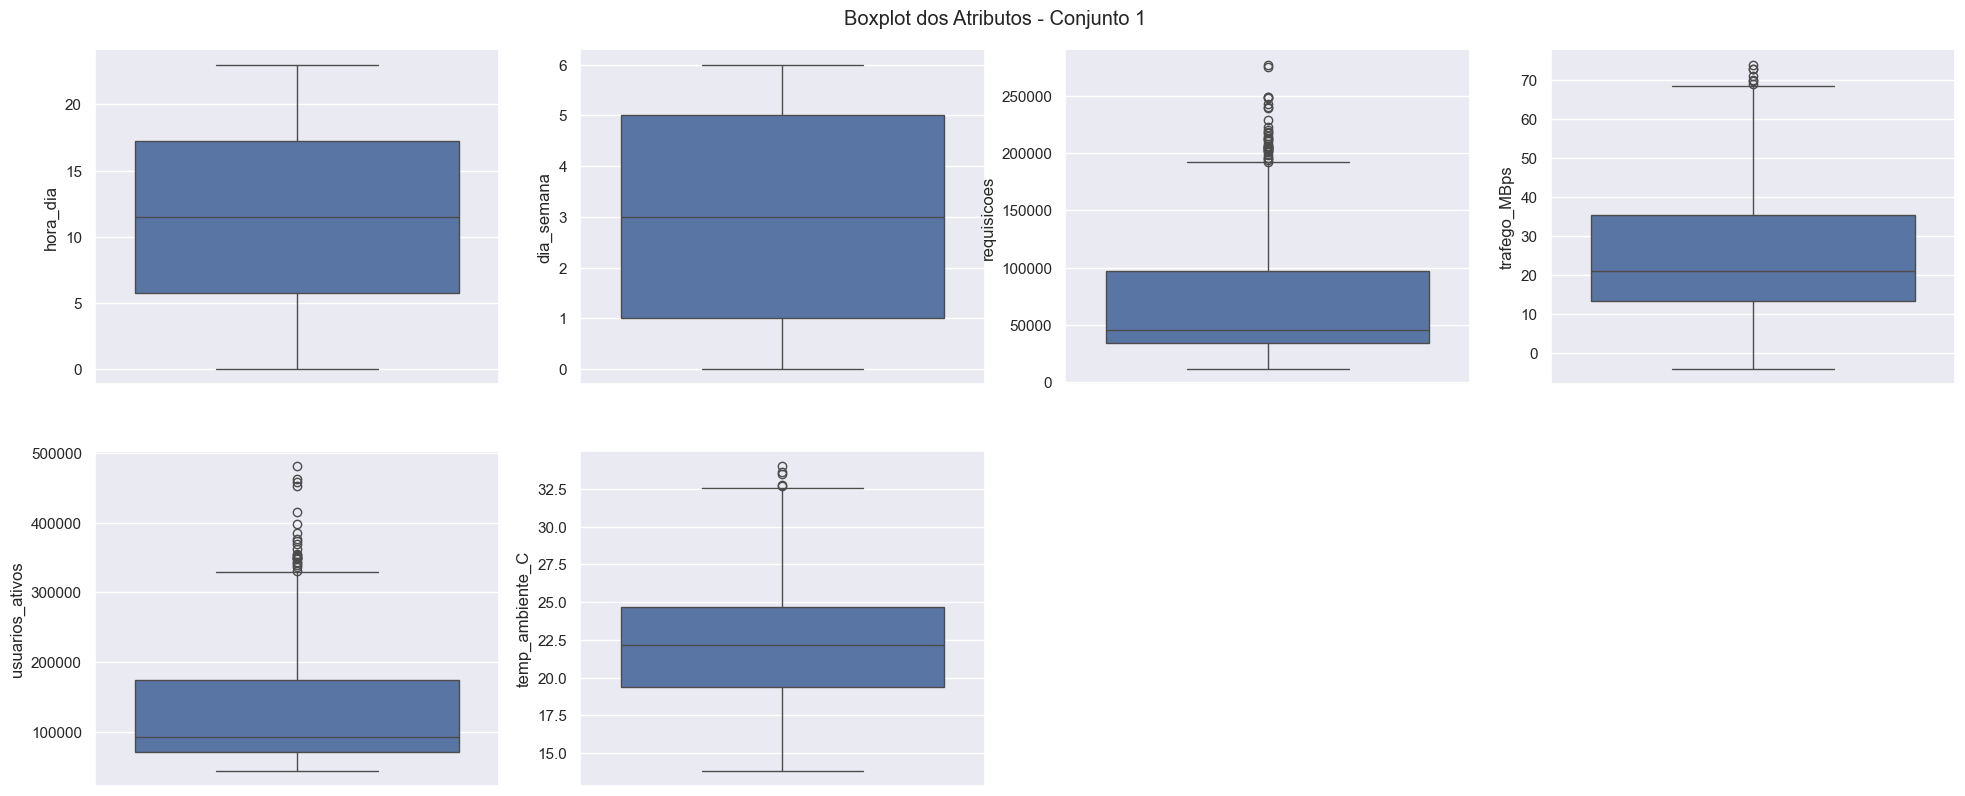

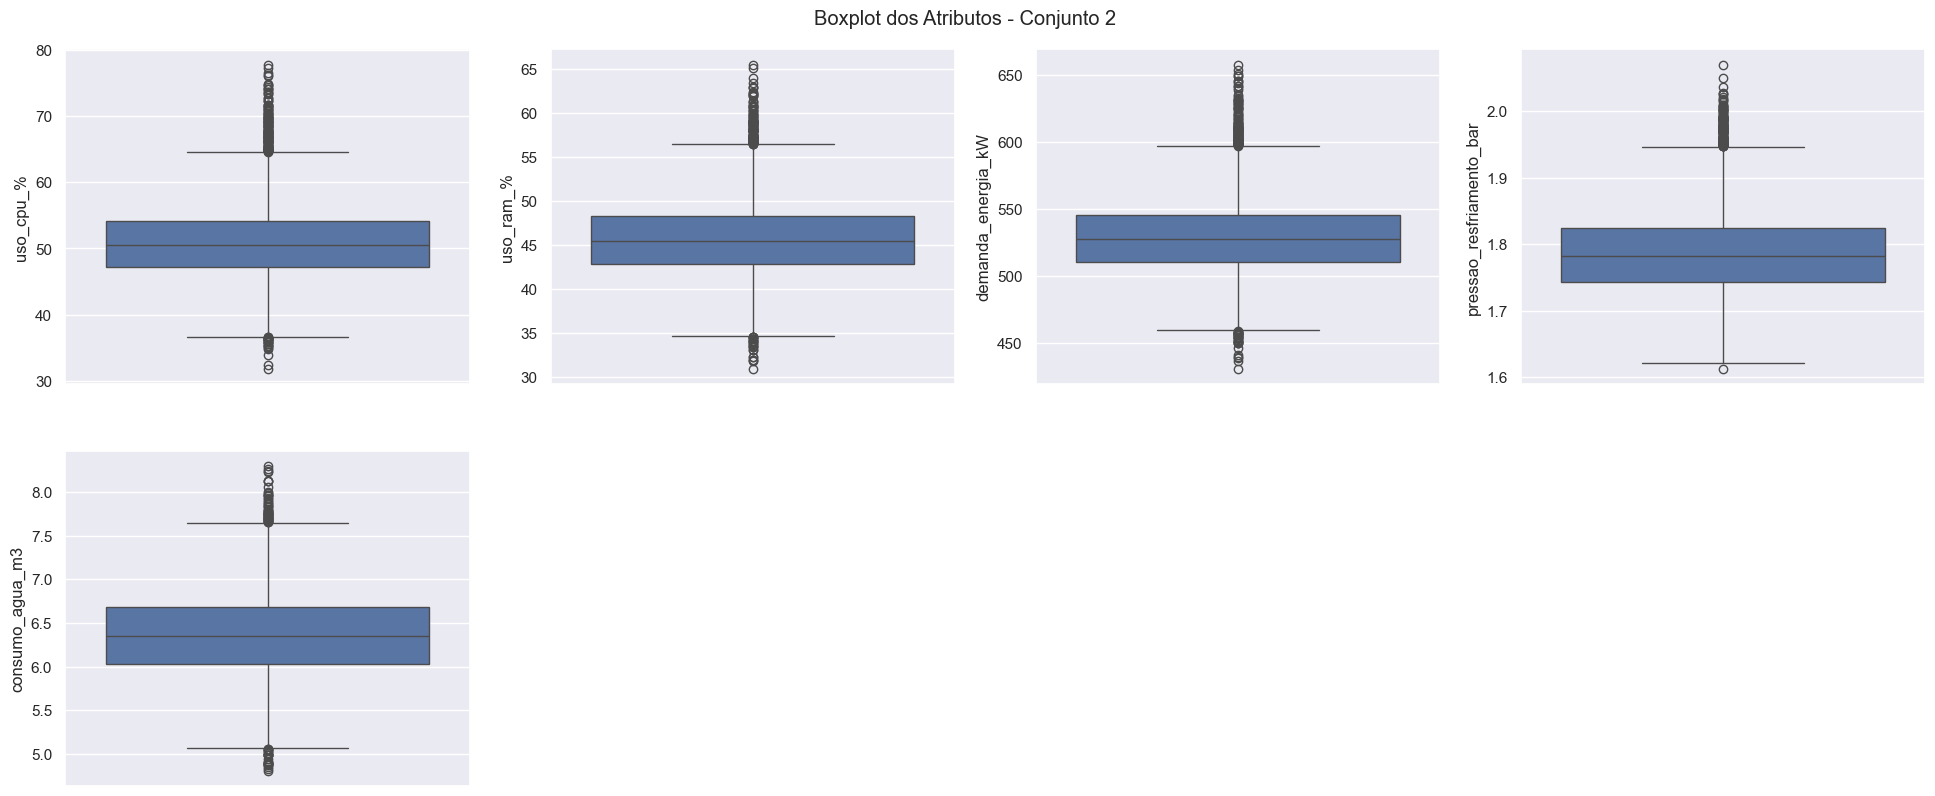

In [9]:
conjuntos = np.array_split(X_nocat.columns.to_numpy(),2)

for j in range(len(conjuntos)):
  f = plt.figure(j)
  n_columns = len(conjuntos[j])
  pos = range(1,n_columns+1)
  f.set_size_inches(24, 20)
  f.tight_layout(pad=1.5)
  f.suptitle(f'Boxplot dos Atributos - Conjunto {j+1}', y=0.90)
  for i, column in zip(range(n_columns), conjuntos[j]):
    axx = f.add_subplot(4,4,pos[i])
    # axx.set_xlabel("Classe")
    # sns.boxplot(y=column, x='label', data=df, ax=axx)
    sns.boxplot(y=column, data=df, ax=axx)

### 1.4. Histogramas dos atributos

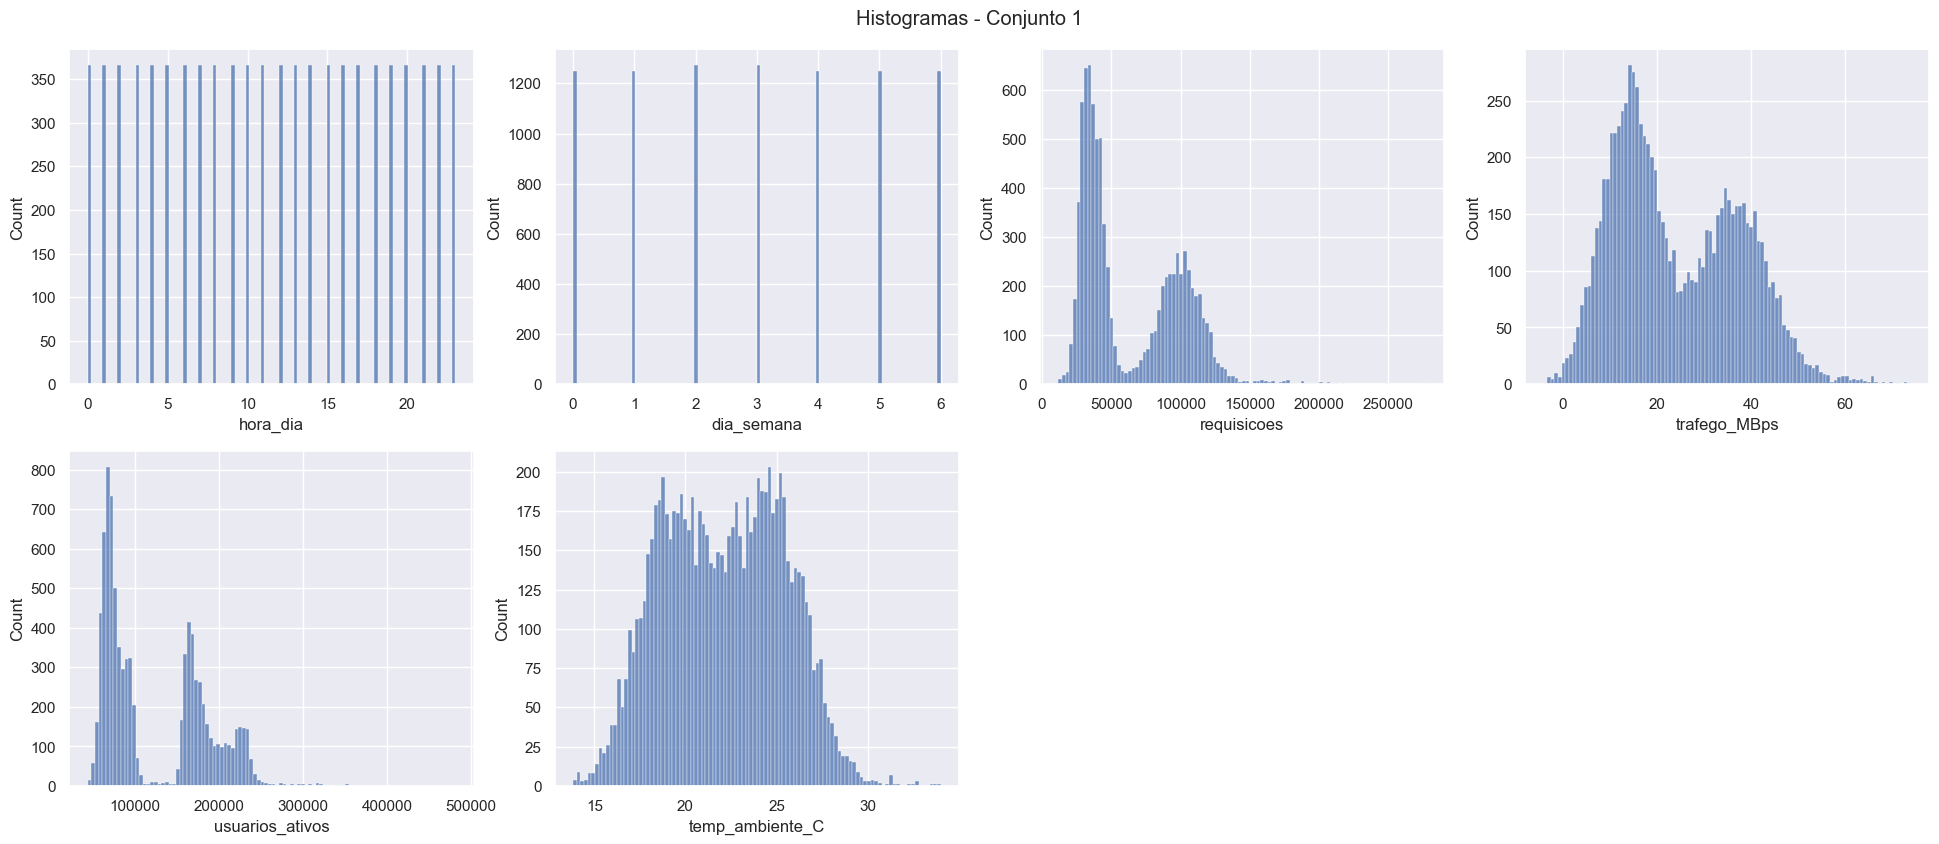

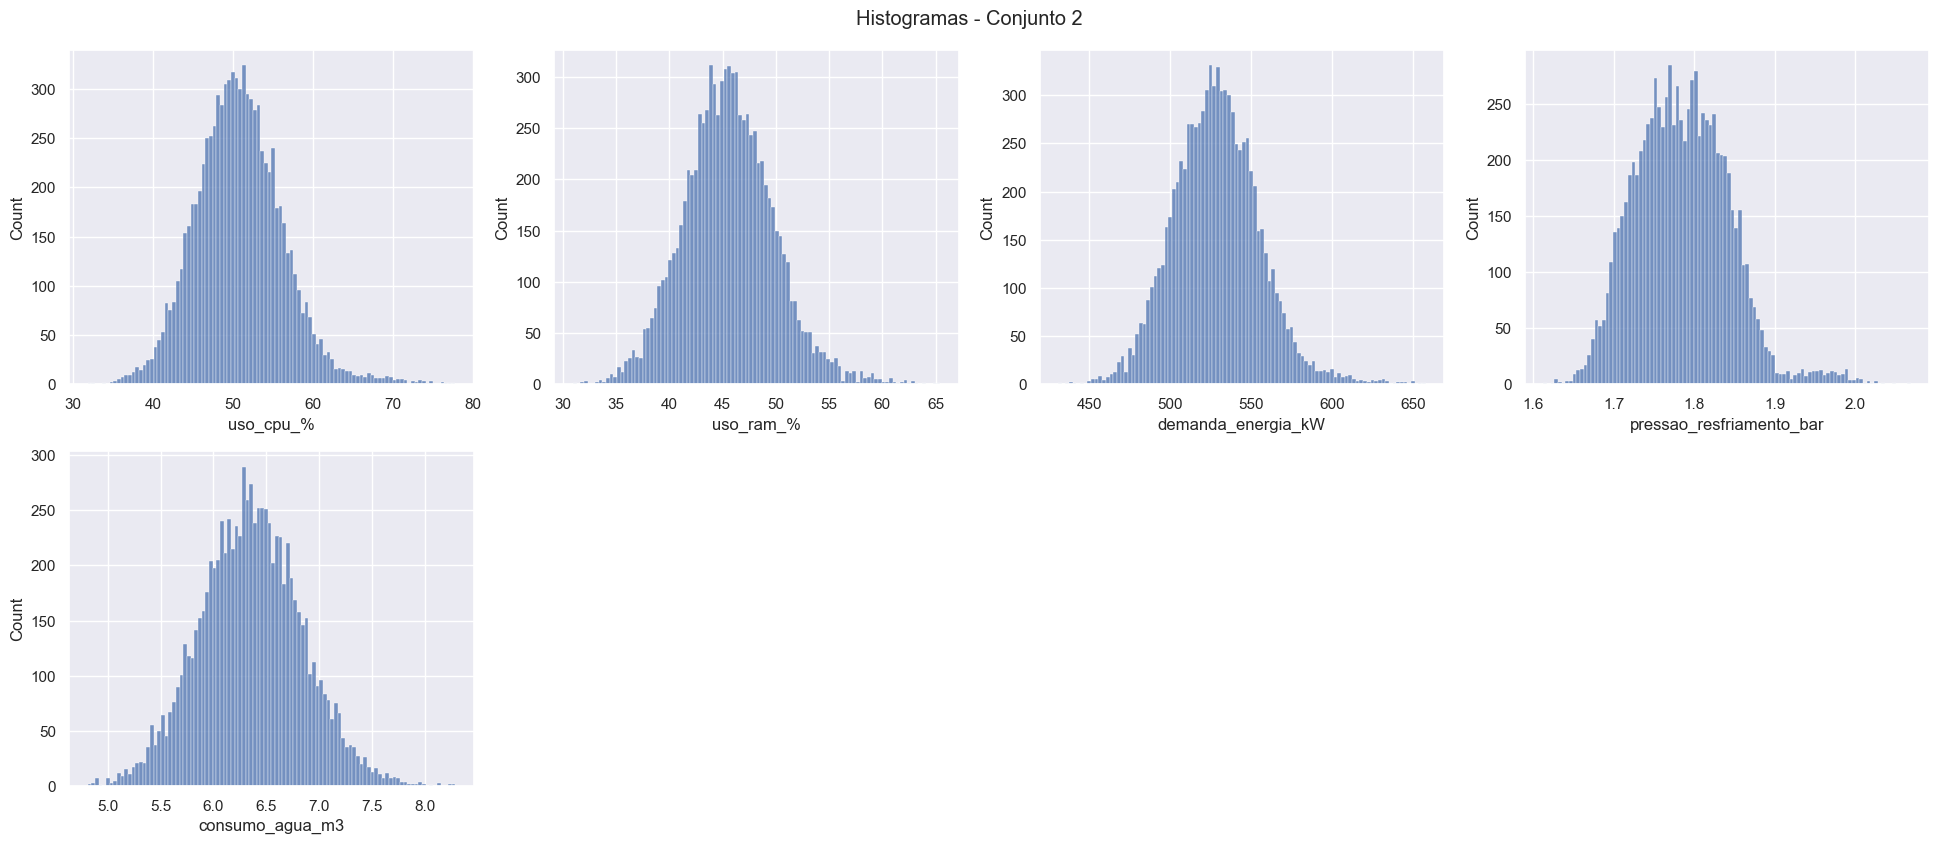

In [10]:
conjuntos = np.array_split(X_nocat.columns.to_numpy(),2)

for j in range(len(conjuntos)):
  f = plt.figure(j)
  n_columns = len(conjuntos[j])
  pos = range(1,n_columns+1)
  f.set_size_inches(24, 20)
  f.tight_layout(pad=1.5)
  f.suptitle(f'Histogramas - Conjunto {j+1}', y=0.90)
  for i, column in zip(range(n_columns), conjuntos[j]):
    axx = f.add_subplot(4,4,pos[i])
    # axx.set_ylabel("Frequência")
    sns.histplot(data=df, x=column, multiple="layer", ax=axx, bins=100)

### 1.5. Análise Estatística e Visualização de Série Temporal de Requisições

#### 1.5.1. Estatísticas Descritivas

A análise inicia com o cálculo de estatísticas descritivas fundamentais para a variável de requisições, seguindo metodologias estabelecidas na literatura de análise exploratória de dados (Tukey, 1977). Foram obtidas quatro medidas essenciais: média aritmética, desvio padrão, valor mínimo e valor máximo. Estas métricas permitem uma caracterização inicial da distribuição dos dados, seguindo a abordagem de análise univariada proposta por Hair, Black e Babin (2019) para compreensão preliminar do comportamento da variável.

A média representa a tendência central dos dados, enquanto o desvio padrão quantifica a variabilidade em torno desta média. Os valores mínimo e máximo delimitam a amplitude total da distribuição, proporcionando insights sobre a dispersão dos dados.

#### 1.5.2. Estatísticas Móveis (Rolling Statistics)

Foram calculadas estatísticas móveis utilizando uma janela temporal de 24 horas, técnica amplamente utilizada na análise de séries temporais (Box, Jenkins & Reinsel, 2015). A média móvel de 24 horas permite identificar tendências de longo prazo e suavizar flutuações de alta frequência, enquanto o desvio padrão móvel possibilita a análise da volatilidade e estabilidade do sistema ao longo do tempo.

Esta abordagem segue a metodologia de suavização exponencial proposta por Brown (2004), particularmente útil para detectar padrões sazonais e tendências em dados temporais.

#### 1.5.3. Visualização de Série Temporal

A visualização foi construída utilizando a biblioteca Matplotlib, seguindo princípios de visualização científica estabelecidos por Tufte (2001). O gráfico apresenta múltiplas camadas de informação:

- **Série original**: Representada em cinza com transparência, mostra os valores instantâneos de requisições
- **Média móvel**: Linha azul contínua que representa a tendência de longo prazo
- **Banda de variabilidade**: Área sombreada que indica o intervalo de ±1 desvio padrão em torno da média móvel

A seleção dos últimos 1000 pontos para visualização segue a recomendação de Cleveland (1993) para manter a legibilidade temporal enquanto preserva informações relevantes sobre o comportamento recente do sistema. A formatação do eixo temporal inclui dia, mês, hora e minuto, seguindo as diretrizes de visualização de séries temporais de Few (2004).

## Referências Bibliográficas

- BOX, G. E. P.; JENKINS, G. M.; REINSEL, G. C. Time Series Analysis: Forecasting and Control. 5th ed. John Wiley & Sons, 2015.

- BROWN, R. G. Smoothing, Forecasting and Prediction of Discrete Time Series. Dover Publications, 2004.

- CLEVELAND, W. S. Visualizing Data. Hobart Press, 1993.

- FEW, S. Show Me the Numbers: Designing Tables and Graphs to Enlighten. Analytics Press, 2004.

- HAIR, J. F.; BLACK, W. C.; BABIN, B. J. Multivariate Data Analysis. 8th ed. Cengage Learning, 2019.

- TUKEY, J. W. Exploratory Data Analysis. Addison-Wesley, 1977.

- TUFTE, E. R. The Visual Display of Quantitative Information. 2nd ed. Graphics Press, 2001.

Volume de Requisições – Média: 64651.7 | Desvio padrão: 36264.7 | Mín: 11670.3 | Máx: 276930.3


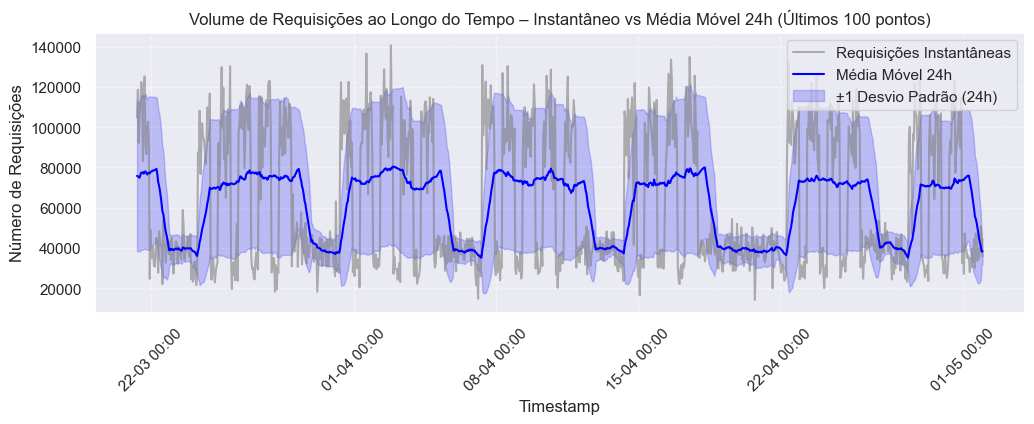

In [11]:
# Estatísticas descritivas: Obtemos a média, desvio padrão, valor mínimo e máximo das requisições e transações PIX
mean_requisicoes = df['requisicoes'].mean()  # Média de requisições
std_requisicoes  = df['requisicoes'].std()   # Desvio padrão das requisições
min_requisicoes  = df['requisicoes'].min()   # Valor mínimo de requisições
max_requisicoes  = df['requisicoes'].max()   # Valor máximo de requisições

# Imprimindo os resultados das estatísticas descritivas para entender melhor o volume de requisições e transações
print(f"Volume de Requisições – Média: {mean_requisicoes:.1f} | Desvio padrão: {std_requisicoes:.1f} | Mín: {min_requisicoes:.1f} | Máx: {max_requisicoes:.1f}")

# Rolling statistics: Calculamos a média móvel e o desvio padrão para requisições e transações PIX ao longo das últimas 24 horas
df['requisicoes_ma_24h'] = df['requisicoes'].rolling(window=24).mean()  # Média móvel de 24h para requisições
df['requisicoes_std_24h'] = df['requisicoes'].rolling(window=24).std()   # Desvio padrão de 24h para requisições

# Criando os gráficos para visualizar as requisições e transações PIX ao longo do tempo
plt.figure(figsize=(12, 8))

# Subplot 1: Volume de requisições ao longo do tempo (últimos 100 pontos)
plt.subplot(2, 1, 1)

# Selecionar os últimos 100 pontos do DataFrame
df_last_100 = df.tail(1000)

plt.plot(df_last_100.index, df_last_100['requisicoes'], color='gray', alpha=0.6, label='Requisições Instantâneas')
plt.plot(df_last_100.index, df_last_100['requisicoes_ma_24h'], color='blue', label='Média Móvel 24h')
plt.fill_between(df_last_100.index,
                 df_last_100['requisicoes_ma_24h'] - df_last_100['requisicoes_std_24h'],
                 df_last_100['requisicoes_ma_24h'] + df_last_100['requisicoes_std_24h'],
                 color='blue', alpha=0.2, label='±1 Desvio Padrão (24h)')

plt.title('Volume de Requisições ao Longo do Tempo – Instantâneo vs Média Móvel 24h (Últimos 100 pontos)')
plt.xlabel('Timestamp')
plt.ylabel('Número de Requisições')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))  # Incluindo hora e minuto para maior precisão
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

### 1.6. Interpretação dos Resultados - média e variabilidade das requisições:

As médias de requisições indicam um volume estável de atividades bancárias. No entanto, o desvio padrão, refletindo a variabilidade dos dados, sugere que há flutuações regulares nos volumes durante o período analisado. Essas flutuações podem estar associadas a picos de atividade em horários de maior tráfego, como horários comerciais, feriados ou eventos específicos.

A média móvel de 24 horas ajuda a identificar tendências de curto e longo prazo no volume de requisições. Se houver uma inclinação consistente na curva (aumento ou diminuição), isso pode indicar uma mudança gradual no comportamento do usuário, como aumento de transações em resposta a campanhas de marketing, novos produtos financeiros ou mudanças econômicas.

As áreas sombreadas indicam o intervalo de variação esperada para as requisições, com base no desvio padrão. Oscilações fora dessa banda, ou picos atípicos, podem ser indicativos de anomalias ou eventos críticos, como:

- Falhas em sistemas que resultam em transações repetidas ou erradas.

- Eventos externos, como falhas em outros canais de pagamento (por exemplo, falhas em outros bancos ou sistemas de pagamento).

## Referências

- [1] BARROSO, L. A.; CLOUDŚ, U.; HÖLZLE, U. **The Datacenter as a Computer: Designing Warehouse-Scale Machines**. Synthesis Lectures on Computer Architecture, 2018.

- [2] DAYARATHNA, M.; WEN, Y.; FAN, R. **Data Center Energy Consumption Modeling: A Survey**. IEEE Communications Surveys & Tutorials, 2016.m

---